In [1]:
from src.random_hamiltonian import random_unitary
import matplotlib.pyplot as plt
import numpy as np
from src import measurements as measure, density_matrix as DM

In [2]:
N = 8
chunks = 2
block_size = N // chunks

In [3]:
b = DM.energy_basis(block_size)
I = DM.Identity(b)

In [4]:
pops = [[.1,.1,.1,.2,.4,.4,.4,.3]]

In [5]:
sys = DM.n_thermal_qbits(pops[0])
sys.change_to_energy_basis()

In [6]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
    for U in Unitarys:
        U.change_to_energy_basis()
        sys = U * sys * U.H
    pops.append(np.real(measure.pops(sys)))

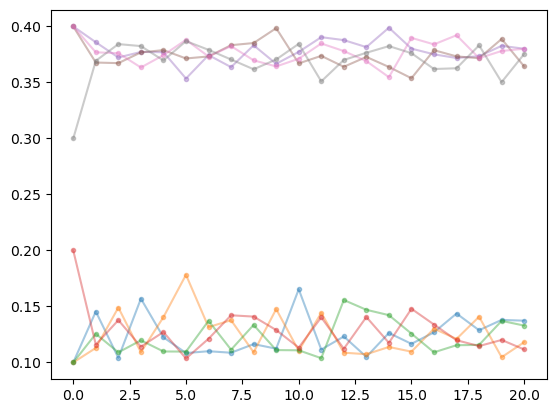

In [7]:
plt.plot(pops,linestyle='-', marker='.',alpha = .4)
plt.show()

In [8]:
pops = [[.1,.1,.1,.2,.4,.4,.4,.3]]
sys = DM.n_thermal_qbits(pops[0])
sys.change_to_energy_basis()

In [9]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
        
    #shift the order of the qbits 
    order = list(range(N))
    shift = np.random.randint(len(order))
    order = np.roll(order, shift)
    U.relabel_basis(order)
    for U in Unitarys:
        U.change_to_energy_basis()
        sys = U * sys * U.H
    pops.append(np.real(measure.pops(sys)))

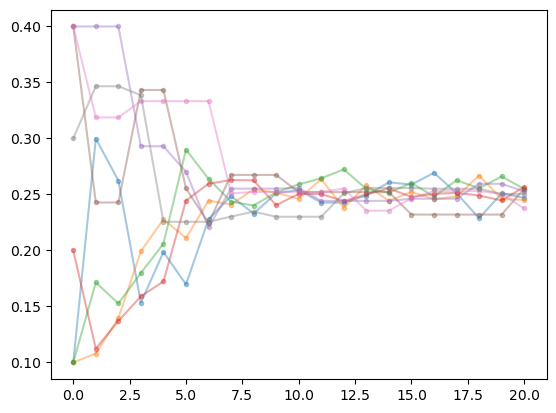

In [10]:
plt.plot(pops,linestyle='-', marker='.',alpha = .4)
plt.show()

In [20]:
pops = [.1,.1,.1,.1,.14,.1,.1,.1]

sys = DM.n_thermal_qbits(pops)
sys.change_to_energy_basis()
temps = [measure.temps(sys)]

In [21]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
        
    #shift the order of the qbits 
    order = list(range(N))
    shift = np.random.randint(len(order))
    order = np.roll(order, shift)
    
    for U in Unitarys:
        U.relabel_basis(order)
        U.change_to_energy_basis()
        sys = U * sys * U.H
    temps.append(np.real(measure.temps(sys)))

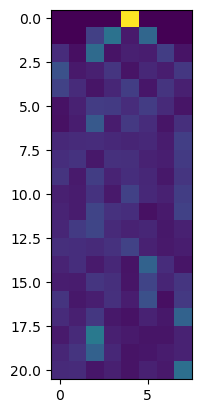

In [22]:
plt.imshow(temps)

In [14]:
measure.average_temp(sys)

0.4666746358410603

In [15]:
measure.extractable_work(.1,sys)

C:\Users\jacks\anaconda3\envs\Qnibble\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:836: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


(0.5719818892389658+1.1505650441896964e-17j)